# Exploratory Data Analysis (EDA)

**Input**: Датасет `data/raw/df_common.csv`

---

## 0. Preparations

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from collections import Counter

import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

df = pd.read_csv('data/raw/df_common.csv', index_col=0)

if 'nickname' in df.columns: 
    df = df.drop('nickname', axis=1)

def print_separator(name: str = '', length = 100):
    print('=' * length)
    if len(name) != 0: 
        print(name.upper())
        print('=' * length, '\n')

print_separator('data reading')

print(f'dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns')
print(f'columns names: {list(df.columns)}')
print('first 10 rows:')
display(df.head(10))

print_separator('dataset info')
df.info()

DATA READING

dataset size: 455,551 rows, 7 columns
columns names: ['raw_text_id', 'dataset_id', 'source_platform', 'is_verified', 'text_raw', 'is_toxic', 'toxicity_type']
first 10 rows:


C:\Temp\ipykernel_15028\1111672960.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw/df_common.csv', index_col=0)


,raw_text_id,dataset_id,source_platform,is_verified,text_raw,is_toxic,toxicity_type
0,0,0,"2ch, pikabu",1,"Верблюдов-то за что? Дебилы, бл...\n",1.0,NaN
1,1,0,"2ch, pikabu",1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,NaN
2,2,0,"2ch, pikabu",1,Собаке - собачья смерть\n,1.0,NaN
3,3,0,"2ch, pikabu",1,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,NaN
4,4,0,"2ch, pikabu",1,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,NaN
5,5,0,"2ch, pikabu",1,Для каких стан является эталоном современная с...,1.0,NaN
6,6,0,"2ch, pikabu",1,В шапке были ссылки на инфу по текущему фильму...,0.0,NaN
7,7,0,"2ch, pikabu",1,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0,NaN
8,8,0,"2ch, pikabu",1,"Ебать тебя разносит, шизик.\n",1.0,NaN
9,9,0,"2ch, pikabu",1,"Обосрался, сиди обтекай\n",1.0,NaN


DATASET INFO

<class 'pandas.core.frame.DataFrame'>
Index: 455551 entries, 0 to 455554
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   raw_text_id      455551 non-null  int64  
 1   dataset_id       455551 non-null  int64  
 2   source_platform  455551 non-null  object 
 3   is_verified      455551 non-null  int64  
 4   text_raw         455551 non-null  object 
 5   is_toxic         320391 non-null  float64
 6   toxicity_type    372865 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.8+ MB


## 1. Basic statistics (df.describe)


In [53]:
print_separator('basic statistics about dataset fields')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
raw_text_id,455551.0,NaN,NaN,NaN,227775.990506,131507.603333,0.0,113887.5,227775.0,341663.5,455554.0
dataset_id,455551.0,NaN,NaN,NaN,1.715898,1.157734,0.0,1.0,1.0,2.0,7.0
source_platform,455551,9,ok.ru,248283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,455551.0,NaN,NaN,NaN,0.850129,0.356946,0.0,1.0,1.0,1.0,1.0
text_raw,455551,455551,"Верблюдов-то за что? Дебилы, бл...\n",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,320391.0,NaN,NaN,NaN,0.190277,0.39252,0.0,0.0,0.0,0.0,1.0
toxicity_type,372865,10,NORMAL,203681,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Missing values analysis

MISSING DATA

          Field  missings     %
    raw_text_id         0  0.00
     dataset_id         0  0.00
source_platform         0  0.00
    is_verified         0  0.00
       text_raw         0  0.00
       is_toxic    135160 29.67
  toxicity_type     82686 18.15
Dataset sparsity: 6.83%
Total cells count: 3,188,857
Total missing cells count: 217,846


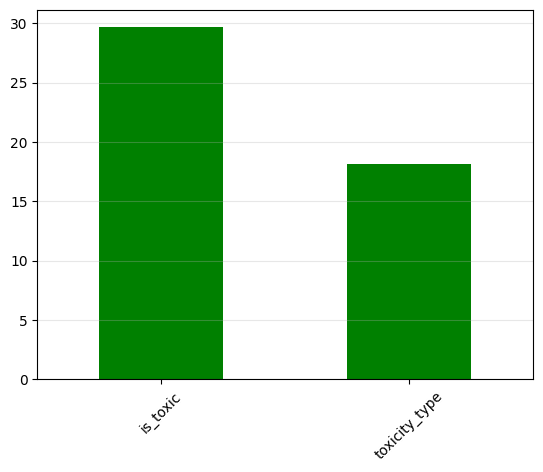

In [54]:
print_separator('missing data')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Процент пропущенных значений'
plt.ylabel = 'Процент (%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

// TODO: replace this logic to dataset parcer + creator

1. **Вычисление `is_toxic` из `toxicity_type`**,
    - Если `is_toxic` отсутствует, вычисляем его из типа токсичности, ✅
    - Токсичные типы (`INSULT`, `THREAT`, etc.) → `is_toxic = 1`, ✅ 
    - Нетоксичный тип (`NORMAL`) → `is_toxic = 0`, ✅
    - **Результат**: Максимальное использование доступной разметки,
2. **Заполнение `toxicity_type = 'NORMAL'`**,
    - Если `toxicity_type` пустой и `is_toxic == 0` → заполняем `NORMAL`, ✅
    - **Результат**: Консистентность данных,

In [55]:
toxic_types = ['INSULT', 'INAPPROPRIATE', 'THREAT', 'OBSCENITY', 'SENSITIVE']
non_toxic_types = ['NORMAL']

# toxicity_type -> is_toxic, if is_toxic is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
if mask_compute_toxic.sum() > 0:
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(toxic_types), 'is_toxic'] = 1.0
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(non_toxic_types), 'is_toxic'] = 0.0

# is_toxic == 1 -> toxicity_type == 'NORMAL', if toxicity_type is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
mask_fill_normal = (df['is_toxic'] == 0) & df['toxicity_type'].isna()
filled_count = mask_fill_normal.sum()
if filled_count > 0:
    df.loc[mask_fill_normal, 'toxicity_type'] = 'NORMAL'

print_separator('basic statistics about dataset fields with toxic info field recovery')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS WITH TOXIC INFO FIELD RECOVERY



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
raw_text_id,455551.0,NaN,NaN,NaN,227775.990506,131507.603333,0.0,113887.5,227775.0,341663.5,455554.0
dataset_id,455551.0,NaN,NaN,NaN,1.715898,1.157734,0.0,1.0,1.0,2.0,7.0
source_platform,455551,9,ok.ru,248283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,455551.0,NaN,NaN,NaN,0.850129,0.356946,0.0,1.0,1.0,1.0,1.0
text_raw,455551,455551,"Верблюдов-то за что? Дебилы, бл...\n",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,447218.0,NaN,NaN,NaN,0.419907,0.493544,0.0,0.0,0.0,1.0,1.0
toxicity_type,428612,10,NORMAL,259428,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MISSING DATA WITH TOXIC INFO FIELD RECOVERY

          Field  missings    %
    raw_text_id         0 0.00
     dataset_id         0 0.00
source_platform         0 0.00
    is_verified         0 0.00
       text_raw         0 0.00
       is_toxic      8333 1.83
  toxicity_type     26939 5.91
Dataset sparsity: 1.11%
Total cells count: 3,188,857
Total missing cells count: 35,272


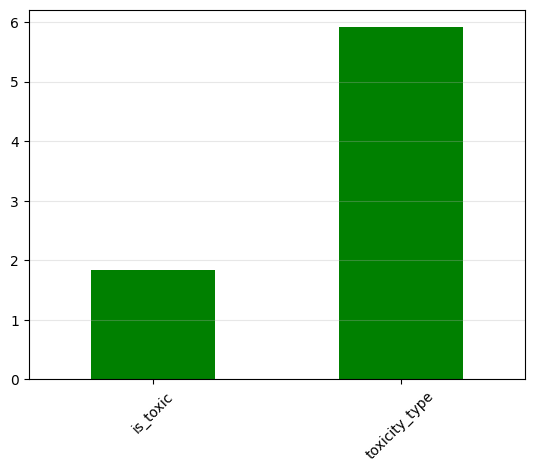

In [56]:
print_separator('missing data with toxic info field recovery')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Persent of missing values'
plt.ylabel = '(%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show() 

## 2. Duplicates and mistakes

In [57]:
print_separator('text duplicate check')

duplicates_count = df.duplicated(subset=['text_raw']).sum()
print(f'{duplicates_count} text duplicate found')

if duplicates_count > 0:
    df = df.drop_duplicates(subset=['text_raw'])
    print(f'Duplicate text removed. There are {len(df)} unique rows left')


TEXT DUPLICATE CHECK

0 text duplicate found


Comment to be deleted: 'is_toxic' can't be filled fully because of toxicity_type doesn't only include (is_toxic==True, is_Toxic==False), in also contains 'inappropriate', 'obscenity' values those can't be accurately passed to is_toxic==True or False.  
> Read "'inappropriate' vs 'sensitive' and how to set up `is_toxic` values?" part in `get_raw_data_and_merge.ipynb` for more accurate info

In [58]:
print_separator('mistakes')

# 1. `is_toxic` must be 0 or 1
print('\n1. `is_toxic` value:')
invalid_toxic = ~df['is_toxic'].isin([0.0, 1.0, 0, 1])
value_mistakes = df[invalid_toxic]
print(f'   value mistakes count: {len(value_mistakes)}')

# 1. `is_toxic` should not conflict with `toxicity_type`
print('\n2. `is_toxic` and `toxicity_type` conflict:')
conflicting_toxic_status = (
    (df['is_toxic'] == 0.0) & 
    df['toxicity_type'].isin(toxic_types)
) | (
    (df['is_toxic'] == 1.0) & 
    df['toxicity_type'].isin(non_toxic_types)
)
conflict_mistakes = df[conflicting_toxic_status]
print(f'   conflict mistakes count: {len(conflict_mistakes)}')

print('\n2. Text length:')
min_len = df['text_raw'].str.len().min()
max_len = df['text_raw'].str.len().max()
print(f'   min: {min_len}, max: {max_len}')

short_texts = (df['text_raw'].str.len() < 3).sum()
if short_texts > 0:
    print(f'   {short_texts} rows with length < 3 symbols found')
    df = df[df['text_raw'].str.len() >= 3]

print(f'\nfinal size: {len(df)}')


MISTAKES


1. `is_toxic` value:
   value mistakes count: 8333

2. `is_toxic` and `toxicity_type` conflict:
   conflict mistakes count: 0

2. Text length:
   min: 1, max: 17662
   98 rows with length < 3 symbols found

final size: 455453


## 3. Toxicity destribution

BINARY TOXICITY DESTRIBUTION

Toxic: 187775 (41.23%)
Non toxic: 259345 (56.94%)
Disbalance: 1:1.38


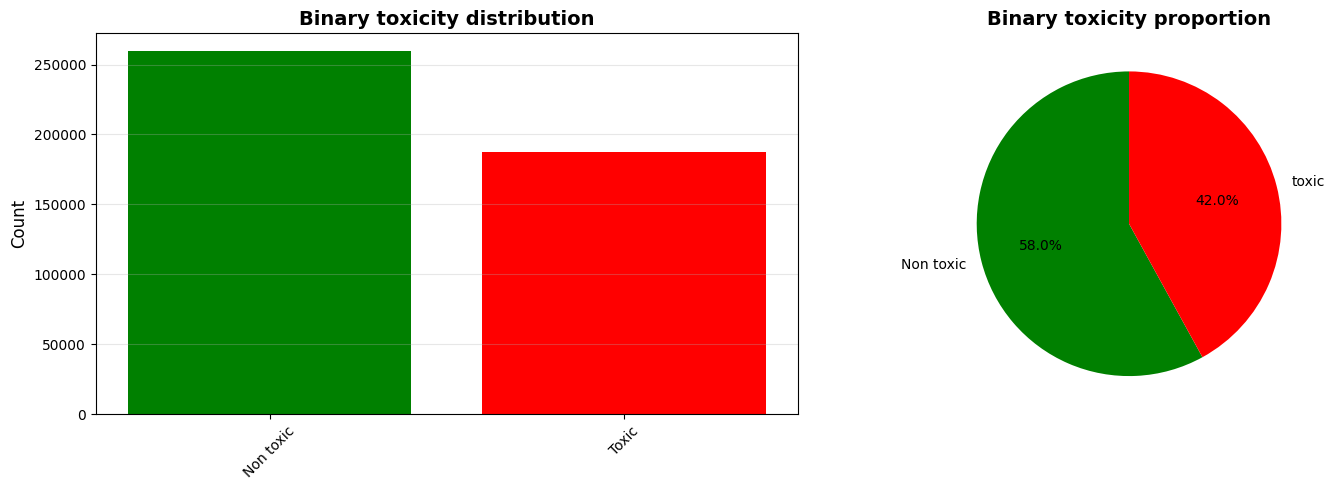

In [59]:
print_separator('binary toxicity destribution')

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print(f'Toxic: {len(toxic)} ({len(toxic)/len(df)*100:.2f}%)')
print(f'Non toxic: {len(non_toxic)} ({len(non_toxic)/len(df)*100:.2f}%)')
print(f'Disbalance: 1:{len(non_toxic)/len(toxic):.2f}')

_, (binary_bar, binary_pie) = plt.subplots(1, 2, figsize=(15, 5))

counts = df['is_toxic'].value_counts()
binary_bar.bar(['Non toxic', 'Toxic'], counts.values, color=['green', 'red'])
binary_bar.set_title('Binary toxicity distribution', fontsize=14, fontweight='bold')
binary_bar.set_ylabel('Count', fontsize=12)
binary_bar.tick_params(axis='x', rotation=45)
binary_bar.grid(axis='y', alpha=0.3)


binary_pie.pie(counts.values, labels=['Non toxic', 'toxic'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
binary_pie.set_title('Binary toxicity proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


NON BINARY TOXICITY DESTRIBUTION



toxicity_type
NORMAL                     259345
SENSITIVE                   91440
INAPPROPRIATE               33142
INSULT                      28567
UNKNOWN TOXIC               26924
INSULT,THREAT                6317
THREAT                       5457
OBSCENITY                    2245
INSULT,OBSCENITY             1766
INSULT,OBSCENITY,THREAT       176
OBSCENITY,THREAT               74
Name: count, dtype: int64

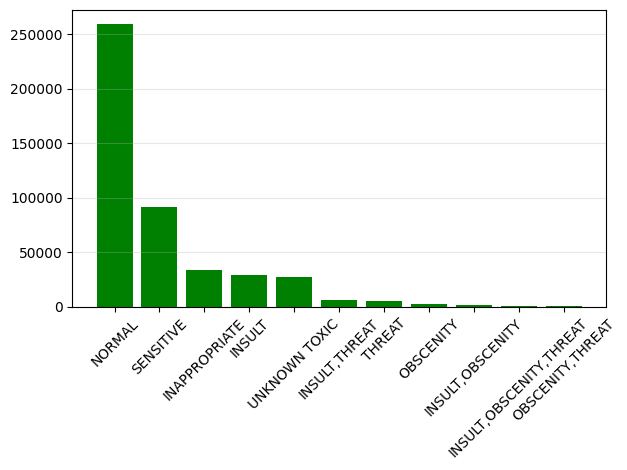

In [60]:
print_separator('non binary toxicity destribution')

types_counts = df['toxicity_type'].fillna('UNKNOWN TOXIC').value_counts()
display(types_counts)

plt.bar(types_counts.index, types_counts.values, color='green')
plt.title ='Non binary toxicity distribution'
plt.ylabel = 'Count'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Basic statistics (lenght, symbols, words)

In [61]:
df['char_len'] = df['text_raw'].str.len()
df['word_len'] = df['text_raw'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words)')

stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['char_len'].mean(),
        non_toxic['char_len'].median(),
        non_toxic['char_len'].std(),
        non_toxic['word_len'].mean(),
        non_toxic['word_len'].median(),
        non_toxic['word_len'].std()
    ],
    'Toxic': [
        toxic['char_len'].mean(),
        toxic['char_len'].median(),
        toxic['char_len'].std(),
        toxic['word_len'].mean(),
        toxic['word_len'].median(),
        toxic['word_len'].std()
    ]
})
stats_df['Diff (%)'] = ((stats_df['Toxic'] - stats_df['Non toxic']) / stats_df['Non toxic'] * 100).round(2)

print(stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(stats_df.iloc[0]["Diff (%)"]):.1f}% tan non toxic')


BASIC STATISTICS (LENGHT, UNIQUE WORDS)

       Metrics  Non toxic      Toxic  Diff (%)
  Mean symbols 120.830076 120.351713     -0.40
median symbols  54.000000  75.000000     38.89
   Std symbols 307.126535 386.054350     25.70
    Mean words  17.649131  18.698176      5.94
  median words   8.000000  12.000000     50.00
     Std words  40.410591  55.770212     38.01

Small conclusion: average toxic texts are shorter on 0.4% tan non toxic


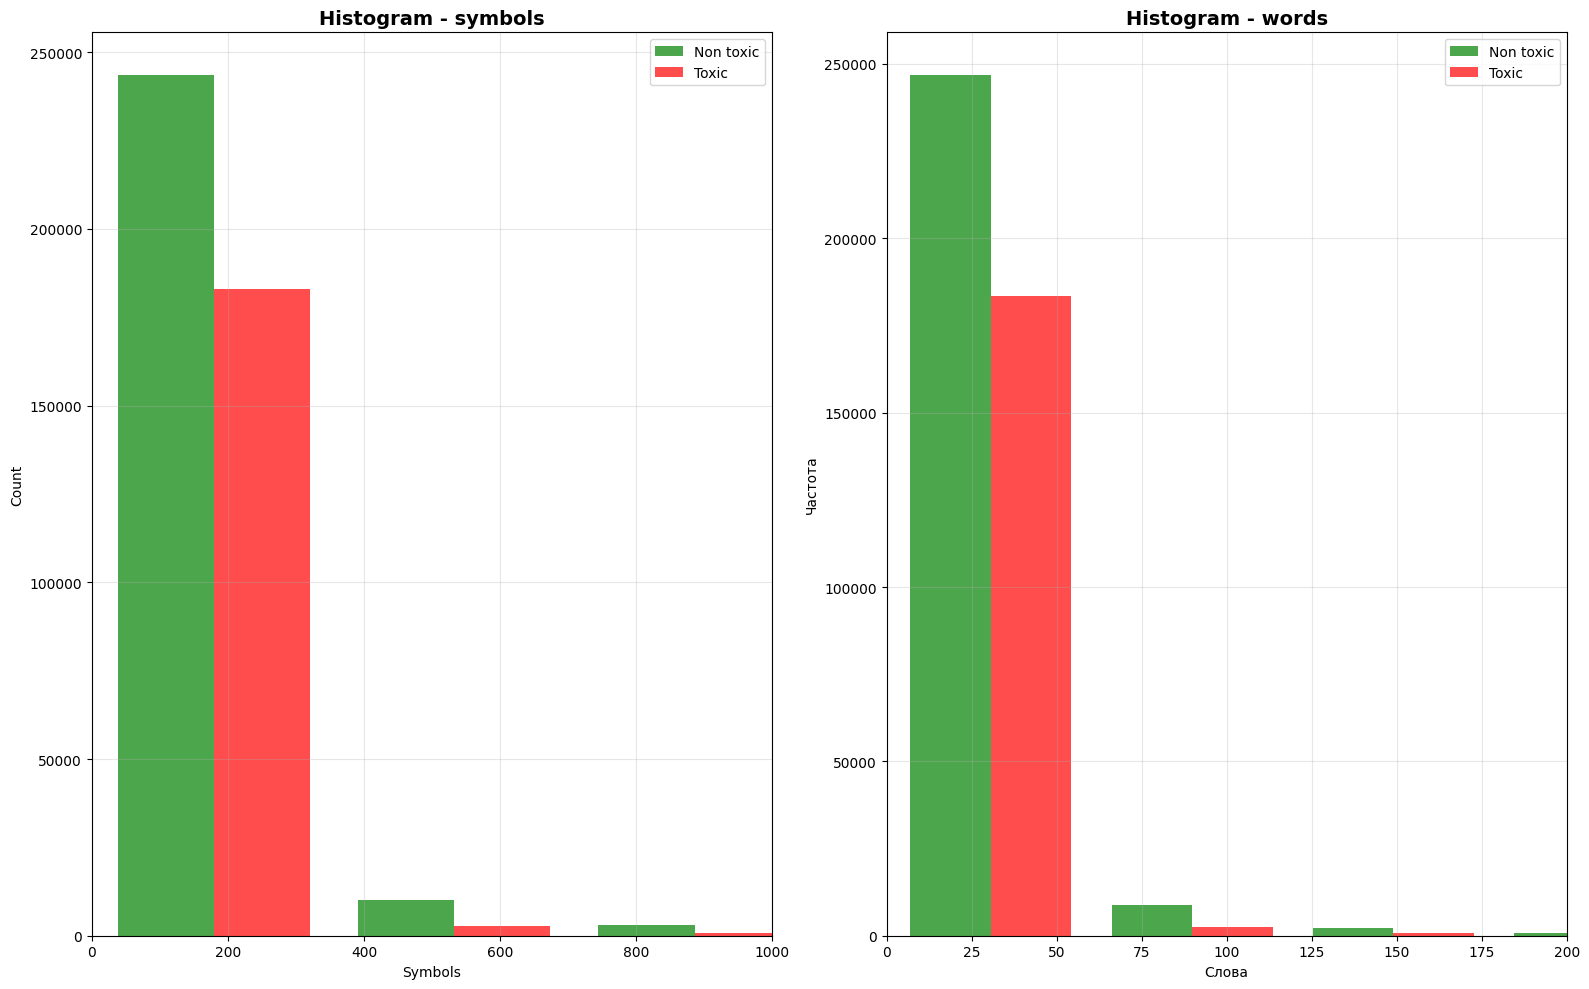

In [62]:
_, (symbols_histogram, words_histogram) = plt.subplots(1, 2, figsize=(16, 10))

# Histogram - symbols
symbols_histogram.hist([non_toxic['char_len'], toxic['char_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
symbols_histogram.set_title('Histogram - symbols', fontsize=14, fontweight='bold')
symbols_histogram.set_xlabel('Symbols')
symbols_histogram.set_ylabel('Count')
symbols_histogram.set_xlim(0, 1000)
symbols_histogram.legend()
symbols_histogram.grid(alpha=0.3)

# Histogram - words
words_histogram.hist([non_toxic['word_len'], toxic['word_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
words_histogram.set_title('Histogram - words', fontsize=14, fontweight='bold')
words_histogram.set_xlabel('Слова')
words_histogram.set_ylabel('Частота')
words_histogram.set_xlim(0, 200)
words_histogram.legend()
words_histogram.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Token-Level Analysis


In [63]:
## TODO: impl normal cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # URLs
    text = re.sub(r'[^а-яёa-z\s]', ' ', text)   # Только буквы
    return ' '.join(text.split())

df['text_clean'] = df['text_raw'].apply(clean_text)
df['tokens'] = df['text_clean'].apply(lambda x: x.split())
df['unique_words'] = df['tokens'].apply(lambda x: len(set(x)))

print(f'Symbols mean after clearing mean: {df["text_clean"].str.len().mean():.1f} symbols')

Symbols mean after clearing mean: 110.8 symbols


In [64]:
df['cleaned_char_len'] = df['text_clean'].str.len()
df['cleaned_word_len'] = df['text_clean'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words) after cleaning')

cleaned_stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['cleaned_char_len'].mean(),
        non_toxic['cleaned_char_len'].median(),
        non_toxic['cleaned_char_len'].std(),
        non_toxic['cleaned_word_len'].mean(),
        non_toxic['cleaned_word_len'].median(),
        non_toxic['cleaned_word_len'].std()
    ],
    'Toxic': [
        toxic['cleaned_char_len'].mean(),
        toxic['cleaned_char_len'].median(),
        toxic['cleaned_char_len'].std(),
        toxic['cleaned_word_len'].mean(),
        toxic['cleaned_word_len'].median(),
        toxic['cleaned_word_len'].std()
    ]
})
cleaned_stats_df['Diff'] = ((cleaned_stats_df['Toxic'] - cleaned_stats_df['Non toxic']) / cleaned_stats_df['Non toxic'] * 100).round(2)

print(cleaned_stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(cleaned_stats_df.iloc[0]["Diff"]):.1f}% tan non toxic after cleaning')

BASIC STATISTICS (LENGHT, UNIQUE WORDS) AFTER CLEANING

       Metrics  Non toxic      Toxic  Diff
  Mean symbols 109.716864 113.826415  3.75
median symbols  49.000000  71.000000 44.90
   Std symbols 277.607093 359.968351 29.67
    Mean words  18.211587  19.332504  6.15
  median words   9.000000  12.000000 33.33
     Std words  44.175338  62.770516 42.09

Small conclusion: average toxic texts are shorter on 3.8% tan non toxic after cleaning


### 6. Frequency of words

FREQUENCY OF WORDS


Words count (toxic texts): 3,630,161
Unique words count (toxic texts): 278,888

Words count (non toxic texts): 4,723,084
Unique words count (non toxic texts): 322,087

Top-20 frequent words (toxic texts):
  и              : 121858
  не             : 94246
  в              : 94010
  br             : 60651
  на             : 55469
  что            : 51108
  а              : 47154
  с              : 37896
  это            : 34626
  я              : 34000

Top-20 frequent words (non toxic texts):
  br             : 158098
  и              : 152342
  в              : 130453
  не             : 99021
  на             : 70754
  а              : 55879
  с              : 53664
  что            : 47457
  это            : 36744
  я              : 32543


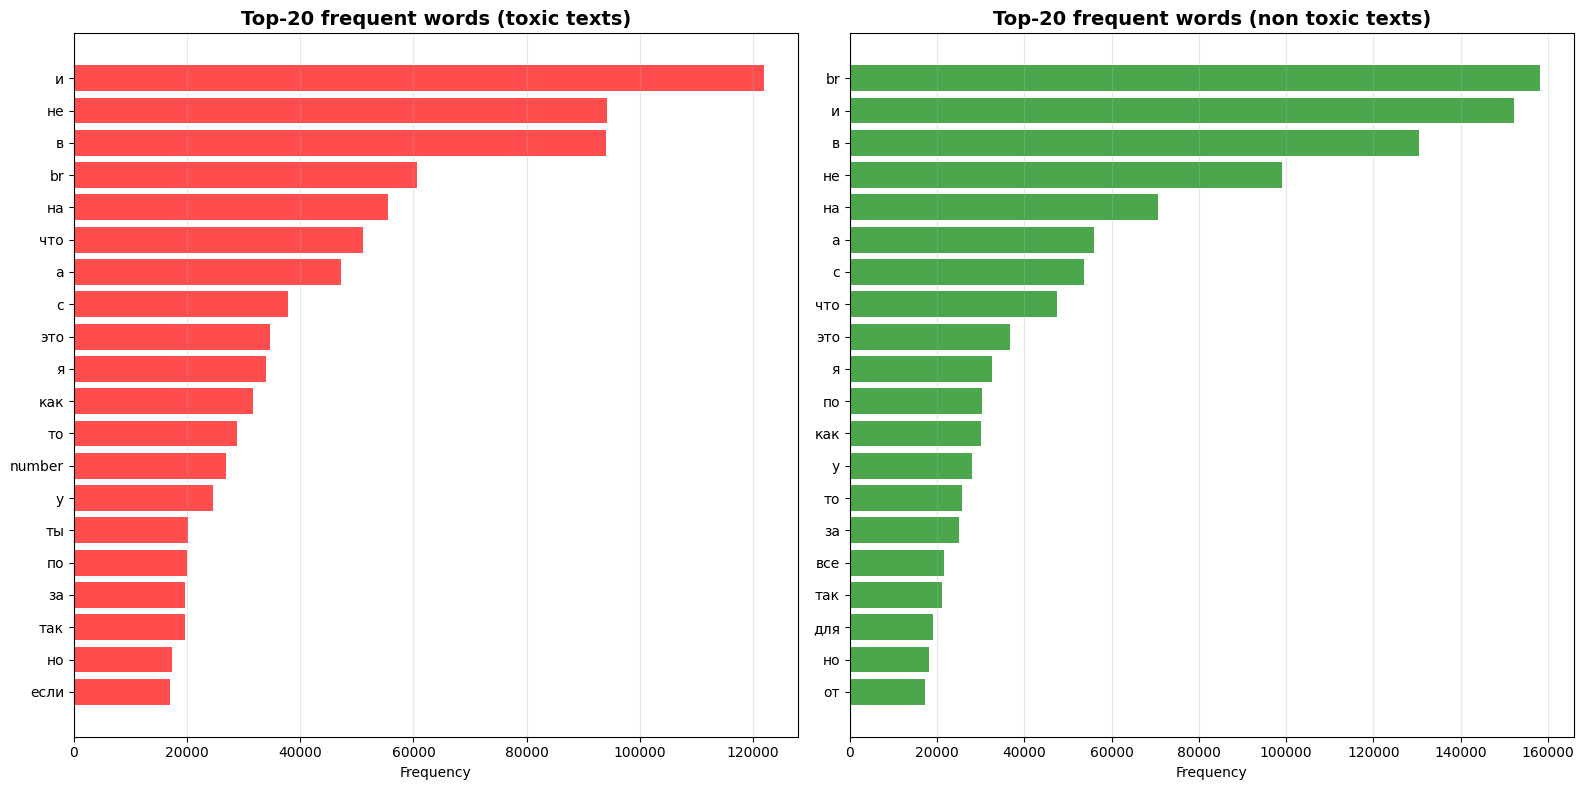

In [65]:
toxic_words = [word for tokens in toxic['tokens'] for word in tokens]
non_toxic_words = [word for tokens in non_toxic['tokens'] for word in tokens]

toxic_freq = Counter(toxic_words)
non_toxic_freq = Counter(non_toxic_words)

print_separator('Frequency of words')

print(f'\nWords count (toxic texts): {len(toxic_words):,}')
print(f'Unique words count (toxic texts): {len(set(toxic_words)):,}')
print(f'\nWords count (non toxic texts): {len(non_toxic_words):,}')
print(f'Unique words count (non toxic texts): {len(set(non_toxic_words)):,}')

print('\nTop-20 frequent words (toxic texts):')
for word, count in toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

print('\nTop-20 frequent words (non toxic texts):')
for word, count in non_toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic = pd.DataFrame(toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[0].barh(range(len(top_toxic)), top_toxic['Frequency'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic)))
axes[0].set_yticklabels(top_toxic['Word'])
axes[0].invert_yaxis()
axes[0].set_title('Top-20 frequent words (toxic texts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic = pd.DataFrame(non_toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[1].barh(range(len(top_non_toxic)), top_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic)))
axes[1].set_yticklabels(top_non_toxic['Word'])
axes[1].invert_yaxis()
axes[1].set_title('Top-20 frequent words (non toxic texts)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### 9. Word Clouds


In [66]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk

# Загружаем список стоп-слов


# Пример русского текста
text = "Это пример русского текста, из которого нужно удалить все служебные слова."

# Получаем список русских стоп-слов
stop_words = set(stopwords.words('russian'))

# Разбиваем текст на слова с помощью регулярного выражения (только буквы и цифры)
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text.lower())

# Фильтруем слова
filtered_words = [word for word in words if word not in stop_words]

# Собираем обратно
filtered_text = " ".join(filtered_words)
print(filtered_text)


это пример русского текста которого нужно удалить служебные слова


In [67]:
# NOTE: delete stop-words before words cloud part: 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anechka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('russian'))
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text.lower())

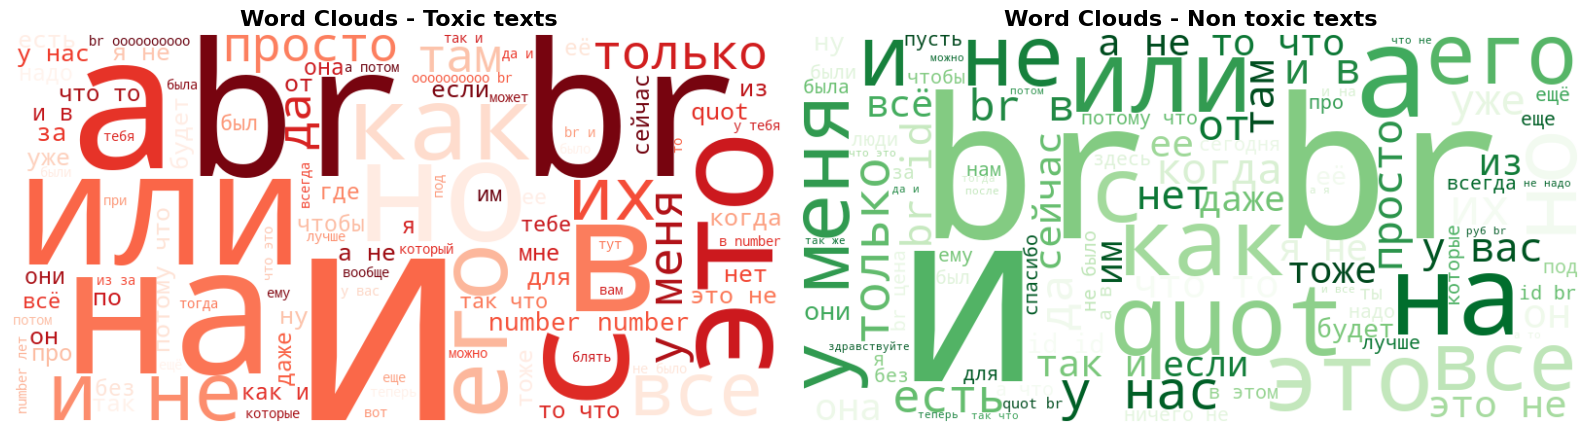

In [75]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))

toxic_text = ' '.join(toxic['text_clean'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white',
                              colormap='Reds', max_words=100).generate(toxic_text)

axes[0].imshow(wordcloud_toxic, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Clouds - Toxic texts', fontsize=16, fontweight='bold')

non_toxic_text = ' '.join(non_toxic['text_clean'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white',
                                  colormap='Greens', max_words=100).generate(non_toxic_text)

axes[1].imshow(wordcloud_non_toxic, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Clouds - Non toxic texts', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## 10. N-граммы (Bigrams и Trigrams)


Bigrams count(toxic text): 3,442,405, unique: 1,793,740
Bigrams count(non toxic text): 4,463,864, unique: 2,166,122
Trigrams count(toxic text): 3,255,347, unique: 2,776,356
Trigrams count(non toxic text): 4,208,477, unique: 3,450,774


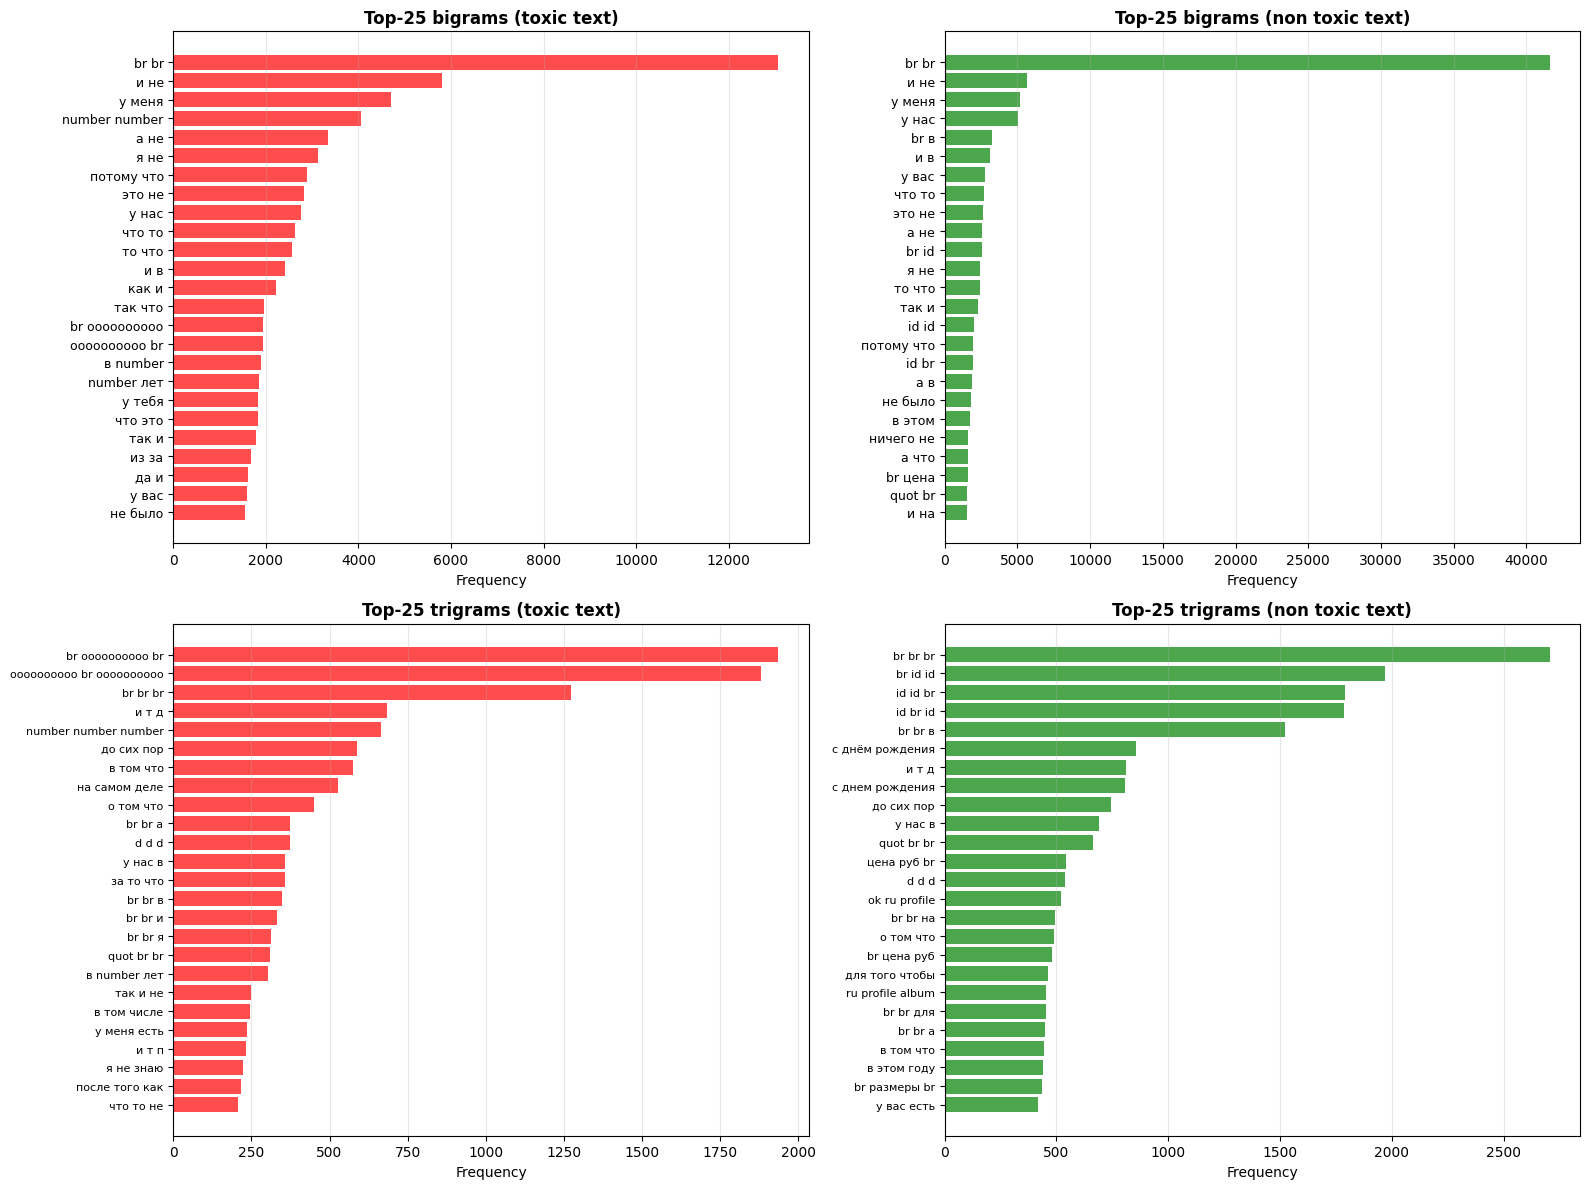

In [ ]:
def get_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

toxic_bigrams = []
toxic_trigrams = []
for tokens in toxic['tokens']:
    toxic_bigrams.extend(get_ngrams(tokens, 2))
    toxic_trigrams.extend(get_ngrams(tokens, 3))

non_toxic_bigrams = []
non_toxic_trigrams = []
for tokens in non_toxic['tokens']:
    non_toxic_bigrams.extend(get_ngrams(tokens, 2))
    non_toxic_trigrams.extend(get_ngrams(tokens, 3))

toxic_bi_freq = Counter(toxic_bigrams)
toxic_tri_freq = Counter(toxic_trigrams)
non_toxic_bi_freq = Counter(non_toxic_bigrams)
non_toxic_tri_freq = Counter(non_toxic_trigrams)

print(f'Bigrams count(toxic text): {len(toxic_bigrams):,}, unique: {len(toxic_bi_freq):,}')
print(f'Bigrams count(non toxic text): {len(non_toxic_bigrams):,}, unique: {len(non_toxic_bi_freq):,}')
print(f'Trigrams count(toxic text): {len(toxic_trigrams):,}, unique: {len(toxic_tri_freq):,}')
print(f'Trigrams count(non toxic text): {len(non_toxic_trigrams):,}, unique: {len(non_toxic_tri_freq):,}')

_, axes = plt.subplots(2, 2, figsize=(16, 12))

top_bi_toxic = pd.DataFrame(toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 0].barh(range(len(top_bi_toxic)), top_bi_toxic['Frequency'], color='red', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_bi_toxic)))
axes[0, 0].set_yticklabels(top_bi_toxic['Bigrams'], fontsize=9)
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Top-25 bigrams (toxic text)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].grid(axis='x', alpha=0.3)

top_bi_non_toxic = pd.DataFrame(non_toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 1].barh(range(len(top_bi_non_toxic)), top_bi_non_toxic['Frequency'], color='green', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_bi_non_toxic)))
axes[0, 1].set_yticklabels(top_bi_non_toxic['Bigrams'], fontsize=9)
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Top-25 bigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].grid(axis='x', alpha=0.3)

top_tri_toxic = pd.DataFrame(toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 0].barh(range(len(top_tri_toxic)), top_tri_toxic['Frequency'], color='red', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_tri_toxic)))
axes[1, 0].set_yticklabels(top_tri_toxic['Trigrams'], fontsize=8)
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('Top-25 trigrams (toxic text)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].grid(axis='x', alpha=0.3)

top_tri_non_toxic = pd.DataFrame(non_toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 1].barh(range(len(top_tri_non_toxic)), top_tri_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_tri_non_toxic)))
axes[1, 1].set_yticklabels(top_tri_non_toxic['Trigrams'], fontsize=8)
axes[1, 1].invert_yaxis()
axes[1, 1].set_title('Top-25 trigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 11. TF-IDF analysis


In [ ]:
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=1)

print(f'TF-IDF analysis with {sample_size:,} texts...')

vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), 
                              min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df_sample['text_clean'])
feature_names = vectorizer.get_feature_names_out()

print(f'TF-IDF matrix shape: {tfidf_matrix.shape}')
print(f'Features count: {len(feature_names)}')


TF-IDF analysis with 10,000 texts...
TF-IDF matrix shape: (10000, 1000)
Features count: 1000


TF-IDF ANALYSIS

Top-10 features(toxic texts):
feature    toxic  non_toxic
     не 0.064113   0.052905
     на 0.047892   0.040492
    что 0.039513   0.027320
    это 0.035563   0.029090
 number 0.033429   0.000000
    как 0.031018   0.021885
     то 0.027562   0.017396
     ты 0.026798   0.008676
     по 0.021469   0.020966
     за 0.021268   0.019894

Top-10 features(non toxic texts):
feature    toxic  non_toxic
     не 0.064113   0.052905
     br 0.009730   0.043346
     на 0.047892   0.040492
    это 0.035563   0.029090
    что 0.039513   0.027320
    как 0.031018   0.021885
     по 0.021469   0.020966
     за 0.021268   0.019894
     то 0.027562   0.017396
    все 0.017302   0.017385

Top-10 features by diff (toxic > non-toxic):
feature    toxic  non_toxic     diff
 number 0.033429   0.000000 0.033429
     ты 0.026798   0.008676 0.018122
    что 0.039513   0.027320 0.012193
     не 0.064113   0.052905 0.011208
   если 0.020129   0.009231 0.010898
     то 0.027562   0.017396 0.0101

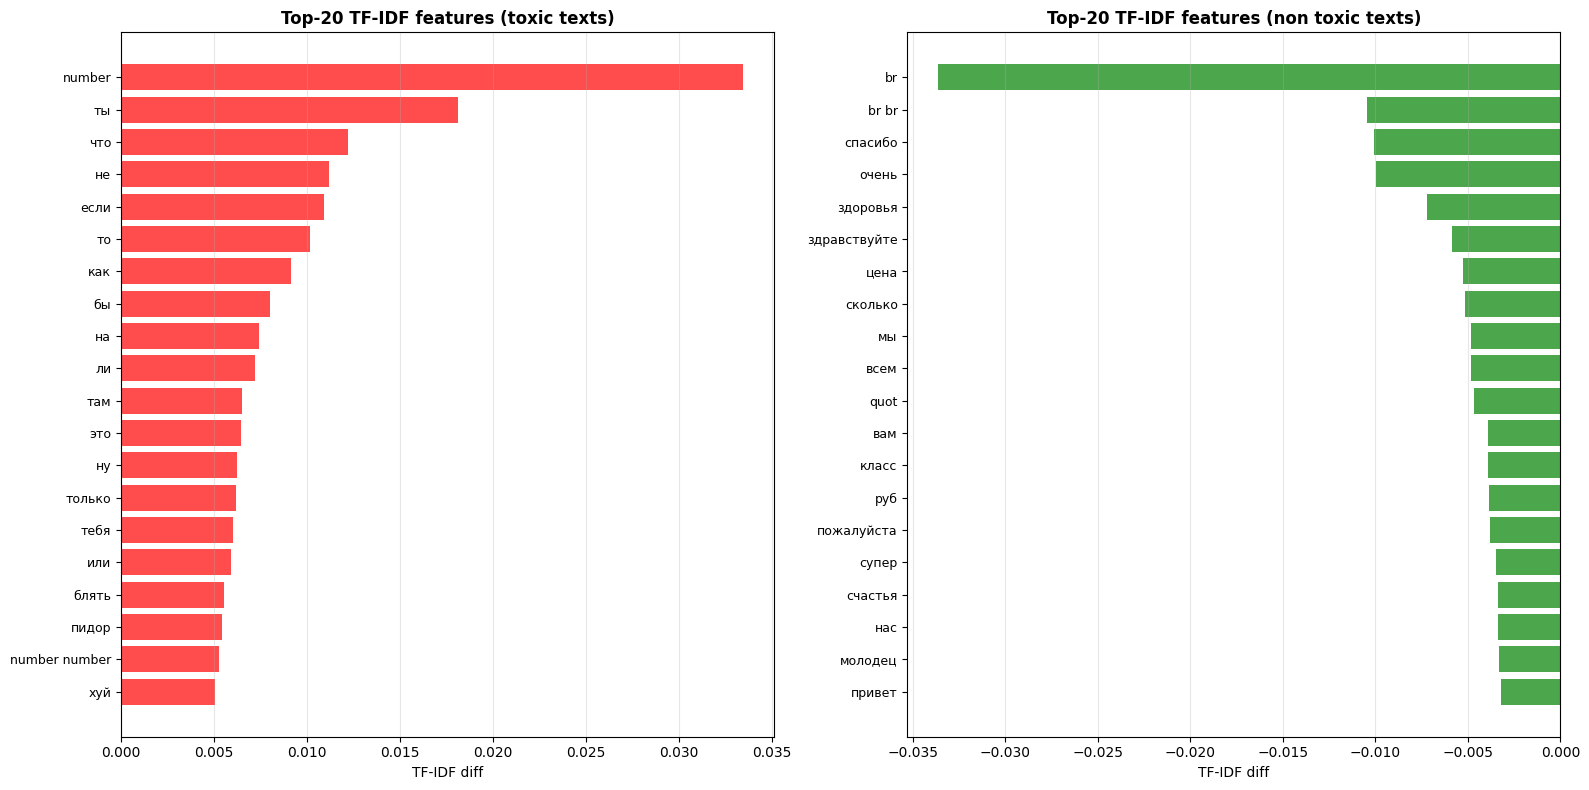

In [ ]:
toxic_idx = df_sample[df_sample['is_toxic'] == 1].index
non_toxic_idx = df_sample[df_sample['is_toxic'] == 0].index

toxic_tfidf = tfidf_matrix[df_sample.index.isin(toxic_idx)].mean(axis=0).A1
non_toxic_tfidf = tfidf_matrix[df_sample.index.isin(non_toxic_idx)].mean(axis=0).A1

tfidf_df = pd.DataFrame({
    'feature': feature_names,
    'toxic': toxic_tfidf,
    'non_toxic': non_toxic_tfidf,
    'diff': toxic_tfidf - non_toxic_tfidf
})

print_separator('TF-IDF analysis')
print('Top-10 features(toxic texts):')
print(tfidf_df.nlargest(10, 'toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features(non toxic texts):')
print(tfidf_df.nlargest(10, 'non_toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features by diff (toxic > non-toxic):')
print(tfidf_df.nlargest(10, 'diff')[['feature', 'toxic', 'non_toxic', 'diff']].to_string(index=False))

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic_tfidf = tfidf_df.nlargest(20, 'diff')
axes[0].barh(range(len(top_toxic_tfidf)), top_toxic_tfidf['diff'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic_tfidf)))
axes[0].set_yticklabels(top_toxic_tfidf['feature'], fontsize=9)
axes[0].invert_yaxis()
axes[0].set_title('Top-20 TF-IDF features (toxic texts)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('TF-IDF diff')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic_tfidf = tfidf_df.nsmallest(20, 'diff')
axes[1].barh(range(len(top_non_toxic_tfidf)), top_non_toxic_tfidf['diff'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic_tfidf)))
axes[1].set_yticklabels(top_non_toxic_tfidf['feature'], fontsize=9)
axes[1].invert_yaxis()
axes[1].set_title('Top-20 TF-IDF features (non toxic texts)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('TF-IDF diff')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 12. correlation analysis

In [ ]:
df.describe()

,raw_text_id,dataset_id,is_verified,is_toxic,char_len,word_len,unique_words,cleaned_char_len,cleaned_word_len
count,455453.000000,455453.000000,455453.000000,447120.000000,455453.000000,455453.000000,455453.000000,455453.000000,455453.000000
mean,227738.580231,1.715424,0.850303,0.419966,119.929279,18.006464,15.783128,110.840030,18.591227
std,131493.882621,1.157369,0.356775,0.493553,339.567322,47.076424,28.121064,312.154848,52.343154
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,113865.000000,1.000000,1.000000,0.000000,36.000000,6.000000,6.000000,33.000000,6.000000
50%,227730.000000,1.000000,1.000000,0.000000,63.000000,10.000000,10.000000,59.000000,10.000000
75%,341594.000000,2.000000,1.000000,1.000000,118.000000,18.000000,18.000000,111.000000,19.000000
max,455554.000000,7.000000,1.000000,1.000000,17662.000000,2961.000000,1885.000000,16272.000000,3453.000000


CORRELATION ANALYSIS

Correlation with `is_toxic`:
is_toxic            1.000000
is_verified         0.082379
unique_words        0.020905
word_len            0.010906
cleaned_word_len    0.010480
cleaned_char_len    0.006442
char_len           -0.000689
Name: is_toxic, dtype: float64


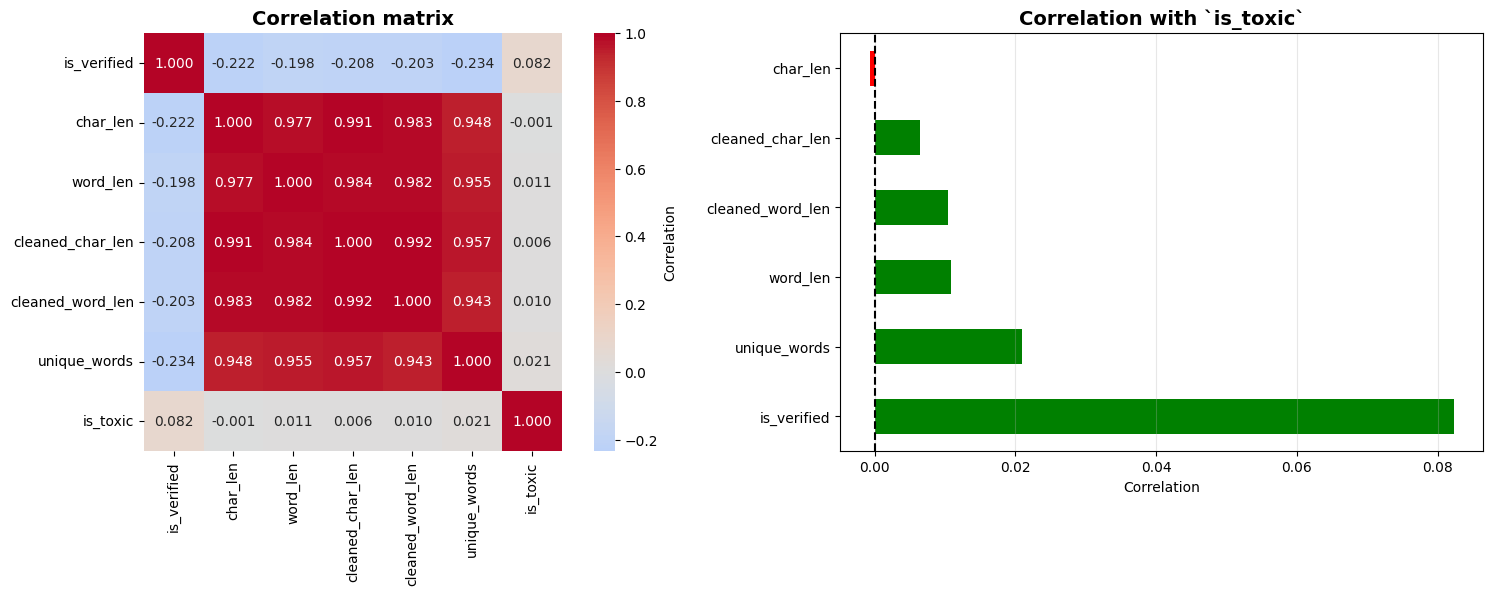

In [ ]:
numeric_features = ['is_verified', 'char_len', 'word_len', 'cleaned_char_len', 'cleaned_word_len', 'unique_words', 'is_toxic']

corr_matrix = df[numeric_features].corr()

print_separator('correlation analysis')

print('Correlation with `is_toxic`:')
target_corr = corr_matrix['is_toxic'].sort_values(ascending=False)
print(target_corr)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation matrix', fontsize=14, fontweight='bold')

target_corr_plot = target_corr.drop('is_toxic')
colors = ['green' if x > 0 else 'red' for x in target_corr_plot.values]
target_corr_plot.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Correlation with `is_toxic`', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation')
axes[1].axvline(x=0, color='black', linestyle='--')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


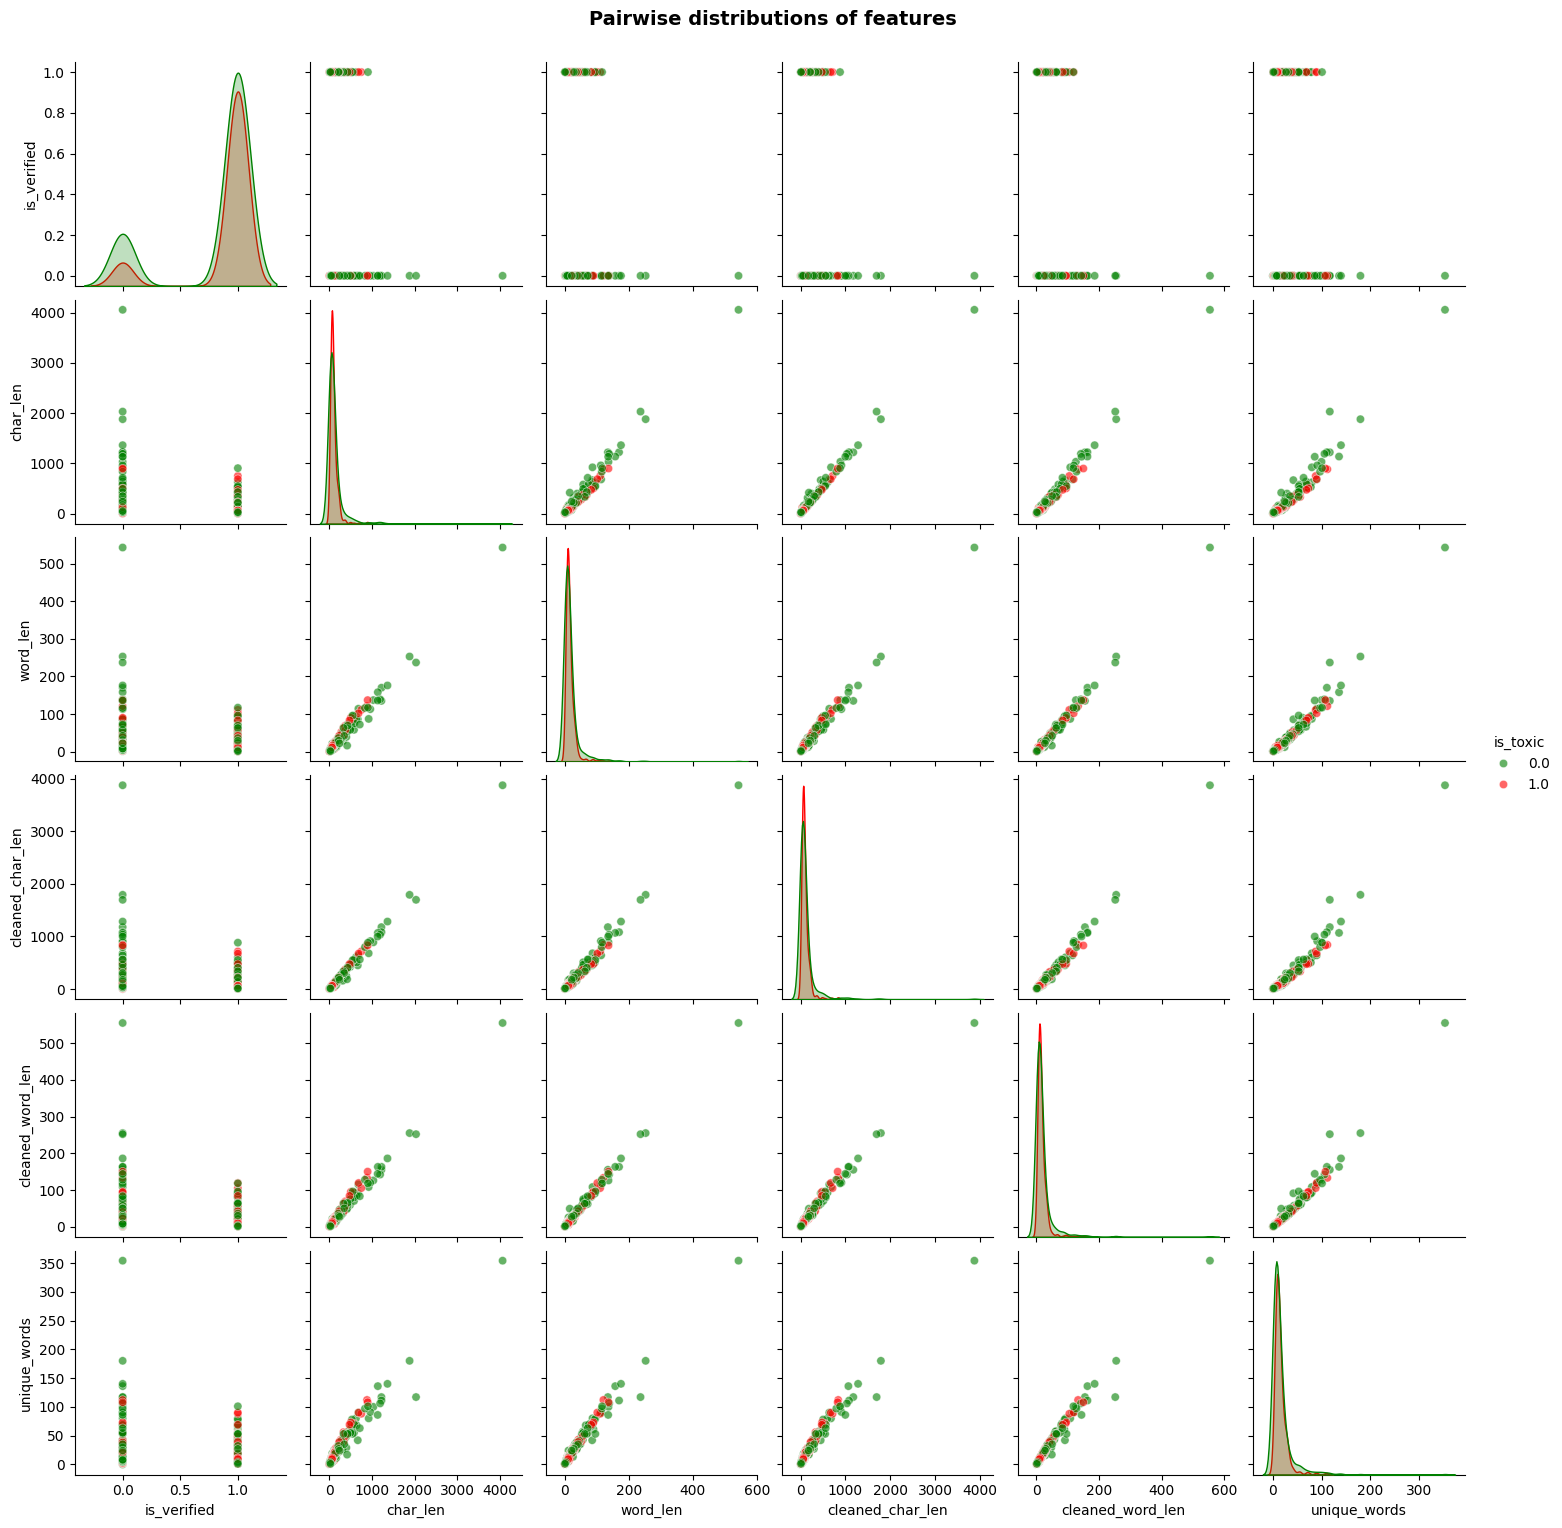

In [ ]:
# Pairplot для ключевых признаков (на выборке)
sample_for_pairplot = df.sample(n=min(1000, len(df)), random_state=1)

sns.pairplot(sample_for_pairplot[numeric_features], 
             hue='is_toxic', palette={0: 'green', 1: 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise distributions of features', y=1.02, fontsize=14, fontweight='bold')
plt.show()


### 13. Распределение Ципфа (Zipf's Law)

> "Если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то частотность n-го слова в таком списке приблизительно обратно пропорциональна его порядковому номеру n (рангу этого слова)"

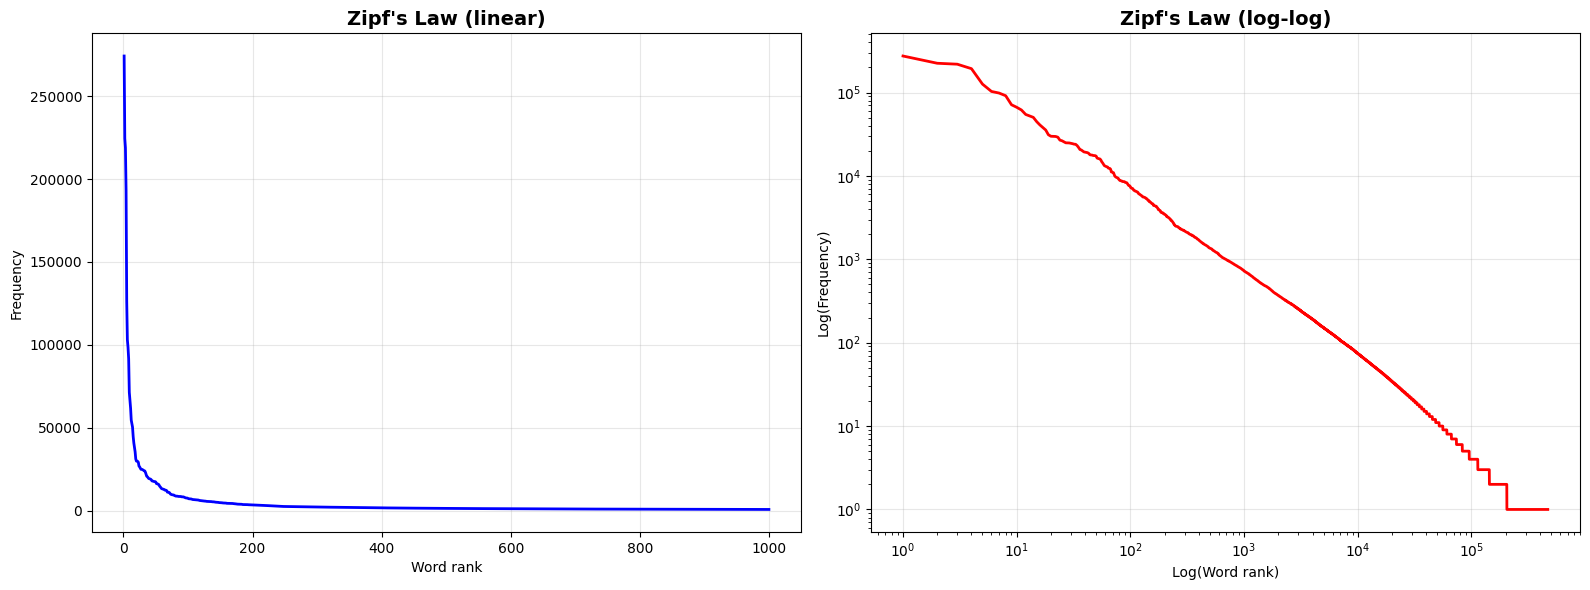

The log-log graph should be roughly linear for a natural language.


In [ ]:
all_words = toxic_words + non_toxic_words
all_freq = Counter(all_words)

freqs_sorted = sorted(all_freq.values(), reverse=True)
ranks = np.arange(1, len(freqs_sorted) + 1)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(ranks[:1000], freqs_sorted[:1000], 'b-', linewidth=2)
axes[0].set_title("Zipf's Law (linear)", fontsize=14, fontweight='bold')
axes[0].set_xlabel('Word rank')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].loglog(ranks, freqs_sorted, 'r-', linewidth=2)
axes[1].set_title("Zipf's Law (log-log)", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log(Word rank)')
axes[1].set_ylabel('Log(Frequency)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print('The log-log graph should be roughly linear for a natural language.')
